In [175]:
import numpy as np # numpy include mathematical operations on array
import pandas as pd # pandas used to work with dataset such as CSV or SQL
import matplotlib.pyplot as plt # matplotlib used in visualization

In [176]:
# CREATE VARIABLE TO STORE DATASET

df = pd.read_csv('car_purchase_decision_dataset.csv') # df = dataframe
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
294,741,Female,43,54500,0
295,704,Male,34,44500,0
296,199,Female,20,27500,0
297,130,Female,38,149500,1


In [177]:
# CREATE DEPENDENT & INDEPENDENT VARIABLE VECTORS

x = df.iloc[:,[2,3]].values # User ID, Gender, Age, AnnualSalary - Independent Variable
y = df.iloc[:,-1].values  # Purchased - Dependent Variable

In [178]:
# HANDLE MISSING VALUES BY EITHER DROPPING OR REPLACING

# Drop
df.dropna(inplace = True)

# Replace
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(x[:, 1:])
# x[:, 1:] = imputer.transform(x[:, 1:])

In [179]:
# SPLIT DATA INTO TRAIN AND TEST SET

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

# print(f"x_train: {x_train}\n")
# print(f"x_test: {x_test}\n")
# print(f"y_train: {y_train}\n")
# print(f"y_test: {y_test}\n")

In [180]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 1:] = sc.fit_transform(x_train[:, 1:])
x_test[:, 1:] = sc.transform(x_test[:, 1:])

# print(f"x_train: {x_train}\n")
# print(f"x_test: {x_test}\n")

In [181]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [182]:
y_pred = classifier.predict(x_test)

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  3],
       [ 8, 25]], dtype=int64)

C:\Users\admin\AppData\Local\Temp\ipykernel_1972\107393054.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


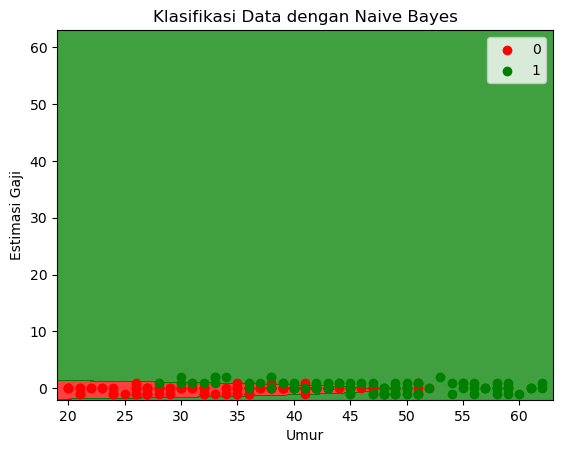

In [184]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
np.arange(start = x_set[:, 0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
np.arange(start = x_set[:, 1].min()-1, stop = x_set[:,0].max()+1, step=0.01))

plt.contourf(x1, x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()